In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#df = pd.read_csv('C:\\learning\\dataset\\ai_job_dataset.csv')
df = pd.read_csv('C:\\learning\\dataset\\apple_5yr_one.csv')

#df = sns.load_dataset('penguins')

In [5]:
df.shape

(1256, 6)

the dataset having 1256 rows and 6 columns

In [6]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

typecasting of columns so later if we have to arithmatic operations it will not give error, as pandas dataseries it is considered as str (numeric colums also) 

from this dataset 1st row is not needed, we can remove it

In [8]:
#df.drop([0],inplace=True)
df.dropna(inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
1,2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400.0
2,2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400.0
3,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400.0
4,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400.0
5,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600.0


In [9]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1255,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,2022-11-30 12:32:42.071713280,164.321062,166.006163,162.443943,164.160646,8.078038e+07
min,2020-06-04 00:00:00,78.329315,79.131269,77.955067,78.579630,2.323470e+07
25%,2021-08-31 12:00:00,136.922234,139.392588,134.935222,136.720468,5.239195e+07
50%,2022-11-29 00:00:00,162.264175,163.728834,160.141728,161.654384,7.046270e+07
75%,2024-02-29 12:00:00,188.222137,189.675969,186.846649,188.102500,9.563880e+07
max,2025-06-02 00:00:00,258.396667,259.474086,257.010028,257.568678,3.743368e+08
std,NaN,38.179689,38.364282,37.891117,38.094942,4.191317e+07


In [10]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

The dataset doesnt have any null values, so no need to do pre-processing. If data has null values then we can remove the row or can replace with mean values.


In [11]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

We are setting an index key to the dataset, its useful for accessing and manipulating data

In [12]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-04,78.329315,79.131269,77.955067,78.832363,87560400.0
2020-06-05,80.560219,80.620973,78.550469,78.579630,137250400.0
2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400.0
2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400.0
2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600.0


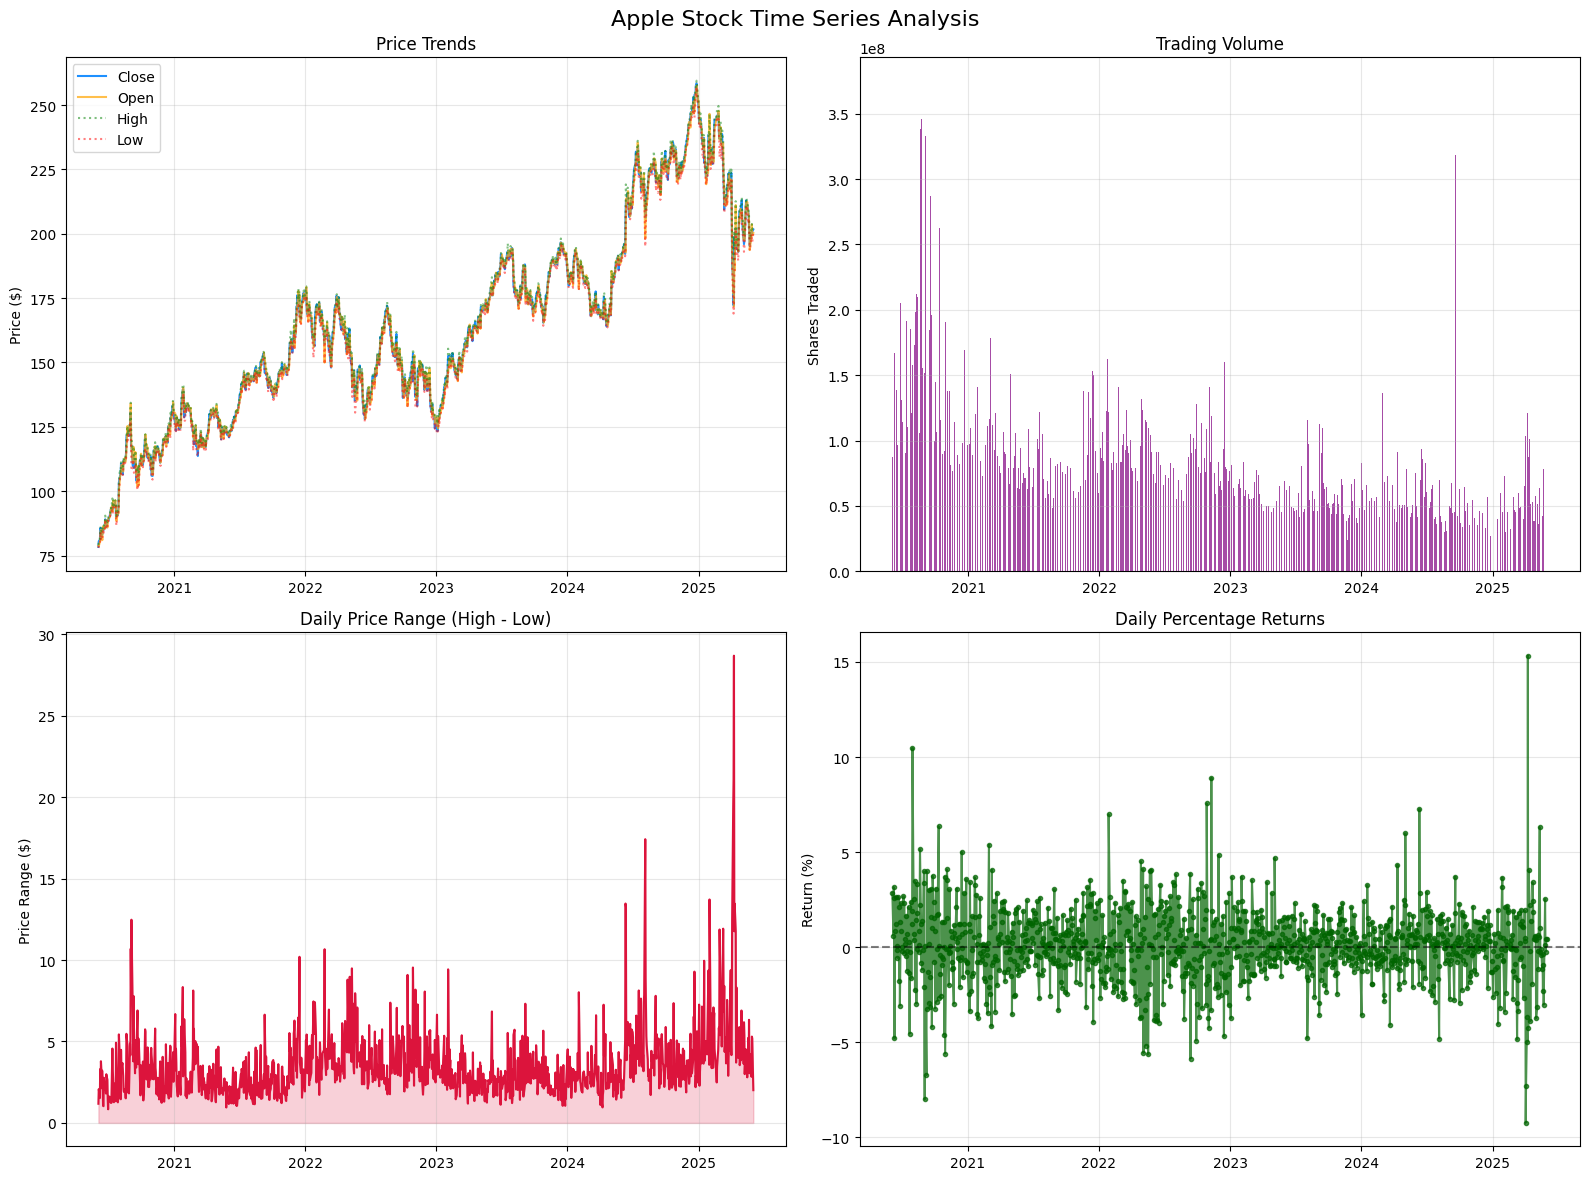

In [13]:
plt.figure(figsize=(16, 12))
plt.suptitle('Apple Stock Time Series Analysis', fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(df['Close'], label='Close', color='dodgerblue')
plt.plot(df['Open'], label='Open', color='orange', alpha=0.7)
plt.plot(df['High'], label='High', color='green', alpha=0.5, linestyle=':')
plt.plot(df['Low'], label='Low', color='red', alpha=0.5, linestyle=':')
plt.title('Price Trends')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.bar(df.index, df['Volume'], color='purple', alpha=0.7)
plt.title('Trading Volume')
plt.ylabel('Shares Traded')
plt.grid(alpha=0.3)

df['Daily_Range'] = df['High'] - df['Low']
plt.subplot(2, 2, 3)
plt.plot(df['Daily_Range'], color='crimson')
plt.fill_between(df.index, df['Daily_Range'], color='crimson', alpha=0.2)
plt.title('Daily Price Range (High - Low)')
plt.ylabel('Price Range ($)')
plt.grid(alpha=0.3)

daily_returns = df['Close'].pct_change() * 100
plt.subplot(2, 2, 4)
plt.plot(daily_returns, color='darkgreen', marker='o', markersize=3, linestyle='-', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Daily Percentage Returns')
plt.ylabel('Return (%)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



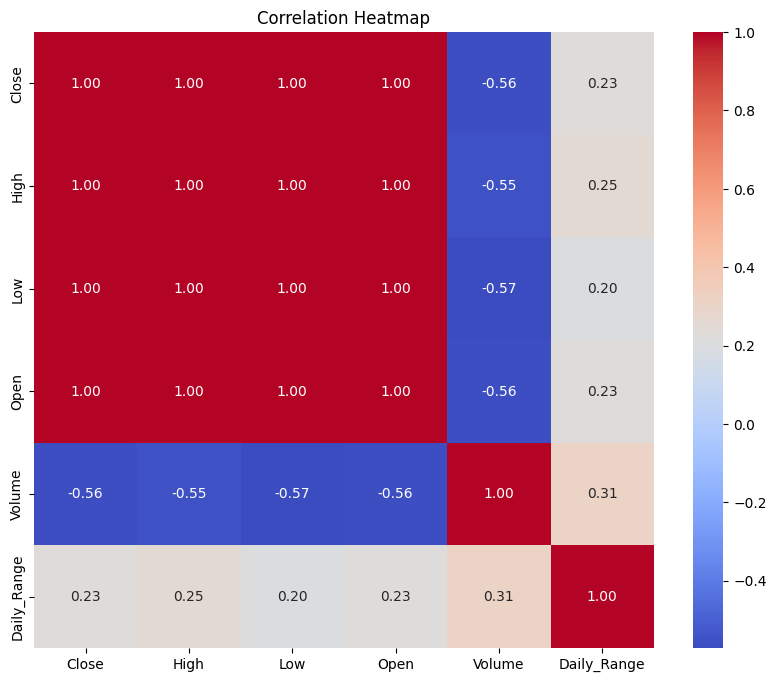

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

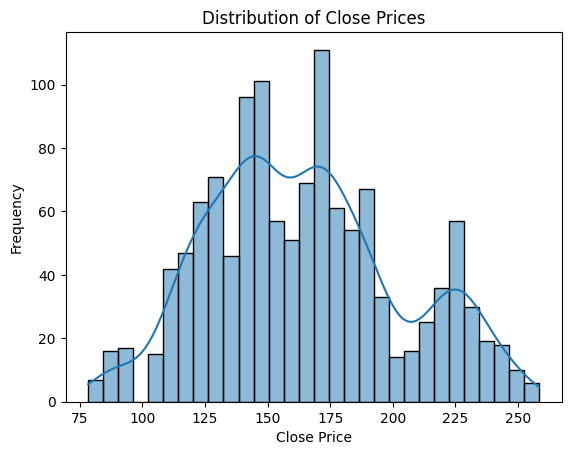

In [16]:
# Histogram of 'Close' prices
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()